<a href="https://colab.research.google.com/github/mehraj31/FUTURE_DS_01/blob/main/BMW_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving BMW sales data (2010-2024).csv to BMW sales data (2010-2024).csv


In [8]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['BMW sales data (2010-2024).csv']))

In [13]:
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
df.info()

display(df.describe())

df.head()

Dataset Shape: (50000, 12)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
 11  Total_Revenue         50000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.6+ MB


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total_Revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680,3.802449e+08
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125,2.623406e+08
min,2010.000000,1.500000,3.000000,30000.000000,100.000000,3.410472e+06
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000,1.689871e+08
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000,3.318010e+08
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000,5.486494e+08
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000,1.194346e+09


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Total_Revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


In [14]:
print("Missing values per column:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

Missing values per column:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Total_Revenue           0
dtype: int64


In [21]:
# 1. Load the dataset
df = pd.read_csv('BMW sales data (2010-2024).csv')

# 2. Calculate Total Revenue
df['Total_Revenue'] = df['Price_USD'] * df['Sales_Volume']

# 3. Define the currency formatting function for the requested look
def format_usd(value):
    return f"${value:,.0f}"

# 4. Calculate Revenue by Continent (Region)
revenue_by_continent = df.groupby('Region')['Total_Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_continent['Total_Revenue'] = revenue_by_continent['Total_Revenue'].apply(format_usd)

# 5. Calculate Revenue by Model
revenue_by_model = df.groupby('Model')['Total_Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_model['Total_Revenue'] = revenue_by_model['Total_Revenue'].apply(format_usd)

# 6. Display Results
print("--- Total Revenue by Continent (Region) ---")
print(revenue_by_continent.to_string(index=False))

print("\n--- Total Revenue by Car Model ---")
print(revenue_by_model.to_string(index=False))

--- Total Revenue by Continent (Region) ---
       Region      Total_Revenue
         Asia $3,250,635,961,348
       Europe $3,188,079,573,212
North America $3,182,938,635,076
  Middle East $3,167,783,530,851
South America $3,113,805,414,620
       Africa $3,108,999,419,352

--- Total Revenue by Car Model ---
   Model      Total_Revenue
7 Series $1,790,070,249,282
3 Series $1,768,534,028,214
      i8 $1,764,743,448,529
      X1 $1,752,985,285,361
5 Series $1,735,712,423,092
      i3 $1,724,197,530,210
      X5 $1,708,653,383,772
      X3 $1,707,951,188,482
      M5 $1,698,467,355,916
      X6 $1,693,423,254,979
      M3 $1,667,504,386,622


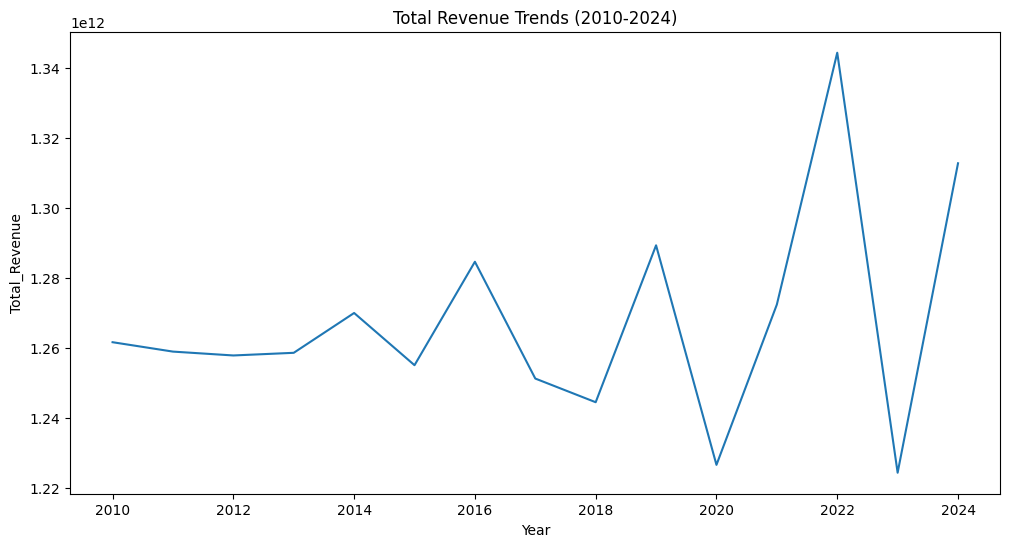

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sales Trend Over Time (Line Chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Year')['Total_Revenue'].sum().reset_index(), x='Year', y='Total_Revenue')
plt.title('Total Revenue Trends (2010-2024)')
plt.show()

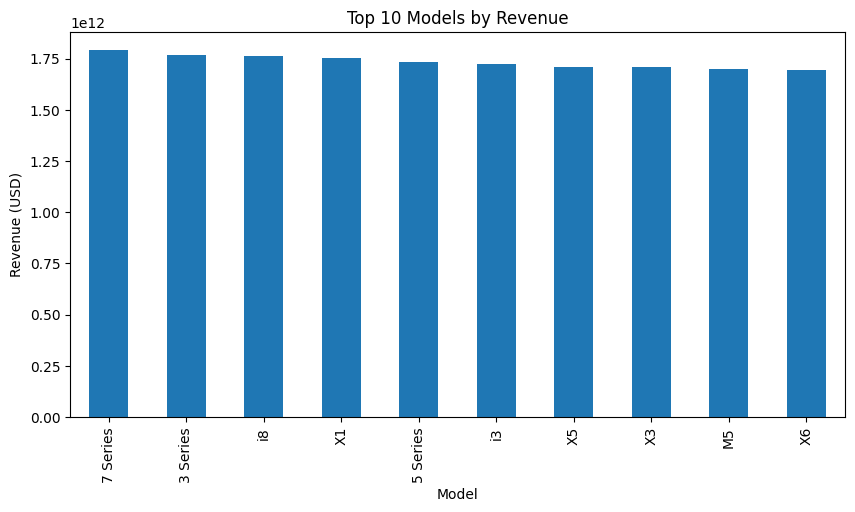

In [25]:
# 2. Top Performing Products (Bar Chart)
plt.figure(figsize=(10, 5))
df.groupby('Model')['Total_Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Models by Revenue')
plt.ylabel('Revenue (USD)')
plt.show()

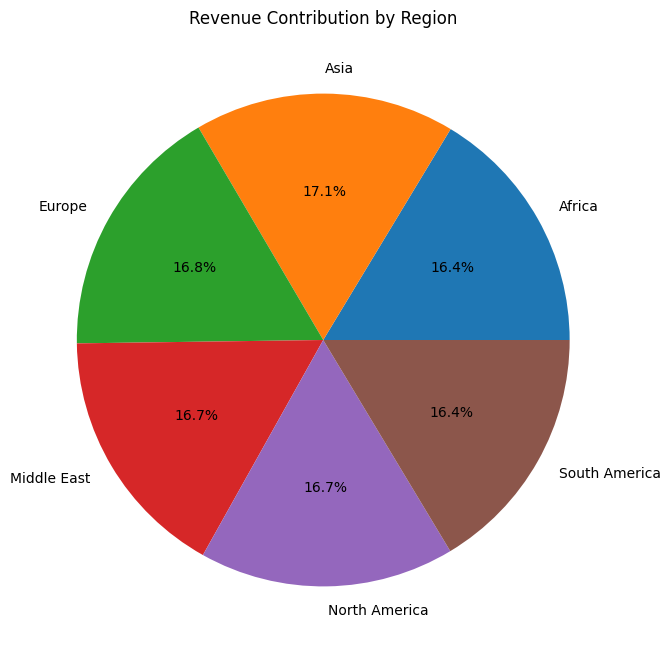

In [26]:
# 3. Market Share by Region (Pie Chart)
plt.figure(figsize=(8, 8))
df.groupby('Region')['Total_Revenue'].sum().plot(kind='pie', autopct='%.1f%%')
plt.title('Revenue Contribution by Region')
plt.ylabel('') # Hides the y-label for a cleaner look
plt.show()

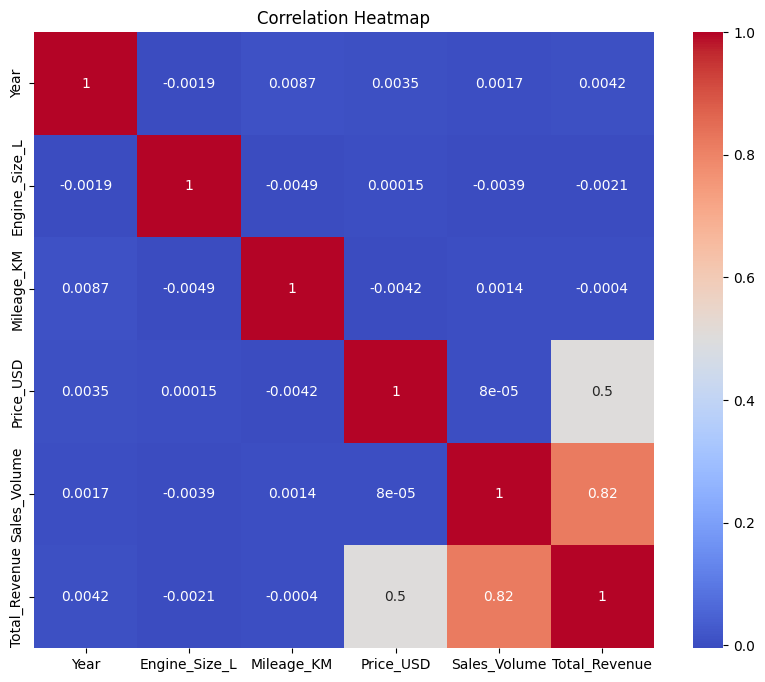

In [27]:
# 4. Correlation Heatmap (To see relationship between Price and Volume)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()